In [1]:
import os
os.chdir('..')

In [2]:
import pickle
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
data_folder = './results'
policy_list = ["standard", "line_search", "sc", "backtracking", "new_lloo", "prox_grad", "scopt"]
policy_labels= {"standard": 'FW-Standard',
                "sc": 'FW-GSC',
                "backtracking": 'BackTrackFW-GSC',
                "new_lloo": 'FW-LLOO',
                "scopt": 'PN',
                "line_search": 'FW-Line Search',
                "prox_grad": 'PG'}
policy_colors = {"standard": 'C0',
                 "line_search": 'C1',
                 "sc": 'C2',
                 "backtracking": 'C3',
                 "scopt": 'C5',
                 "prox_grad": 'C6',
                 "new_lloo": 'C7'}
line_styles = {"standard": 'solid',
                "sc": 'dotted',
                "backtracking": 'dashed',
                "new_lloo": (0, (1, 1)),
                "scopt": 'dashdot',
                "line_search": (0, (5, 1)),
                "prox_grad": (0, (3, 1, 1, 1))}

In [14]:
results_dir = './results/dwd'

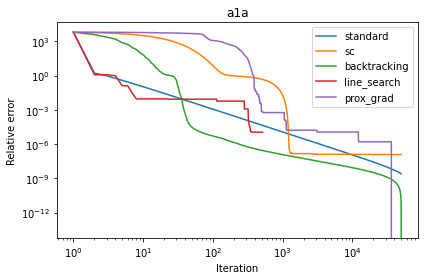

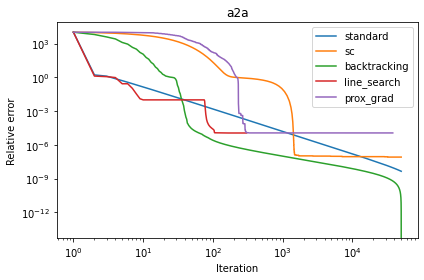

In [15]:
files = ['a1a', 'a2a']
min_time=10
for file_name in files:
    problem_path = os.path.join(results_dir, file_name + '.pkl')
    with open(problem_path, 'rb') as f:
        problem_data = pickle.load(f)
    policy_list = list(problem_data.keys())
    f_min = min([problem_data[policy]['f_hist'][-1] for policy in policy_list])
    for policy in policy_list:
        policy_error_hist = [(f_val - f_min) / abs(f_min) for f_val in problem_data[policy]['f_hist']]
        problem_data[policy]['error_hist'] = policy_error_hist

        temp_min = min(x for x in problem_data[policy]['time_hist'][1:] if x > 0)
        min_time = np.minimum(min_time, temp_min)
        plt.plot(range(1, len(policy_error_hist) + 1), np.minimum.accumulate(policy_error_hist), label=policy)
        #plt.plot(np.cumsum(problem_data[data_name][policy]['time_hist']) + min_time, np.minimum.accumulate(policy_error_hist), label=policy)
    plt.legend()
    plt.title(file_name)
    plt.xlabel('Iteration')
    plt.ylabel('Relative error')
    plt.xscale('log')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()